# 4DATA - Graded exercise

## Part 1
### Step 1 et 2

In [2]:
rm(list = ls())
library(arules)
data(Groceries)

### Step 3

In [3]:

summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

Après un summary du dataset on obtient de nombreuses informations.

#### a. 
Il y a **169 produits** différents dans le dataset.

#### b. 
Il y a **9835 transactions** dans le dataset.

#### c. 
La densité dest de **2.6%**.

#### d. 
Cette valeur représente la quantité de produit que contienne en moyenne chaque transactions par rapport à la quantité total de produit.


#### e. 
Les 3 produits les plus fréquents dans le dataset sont: **le lait entier, les légumes et les petits pains**. On peut voir cela de manière plus précise grâce à un histogramme.


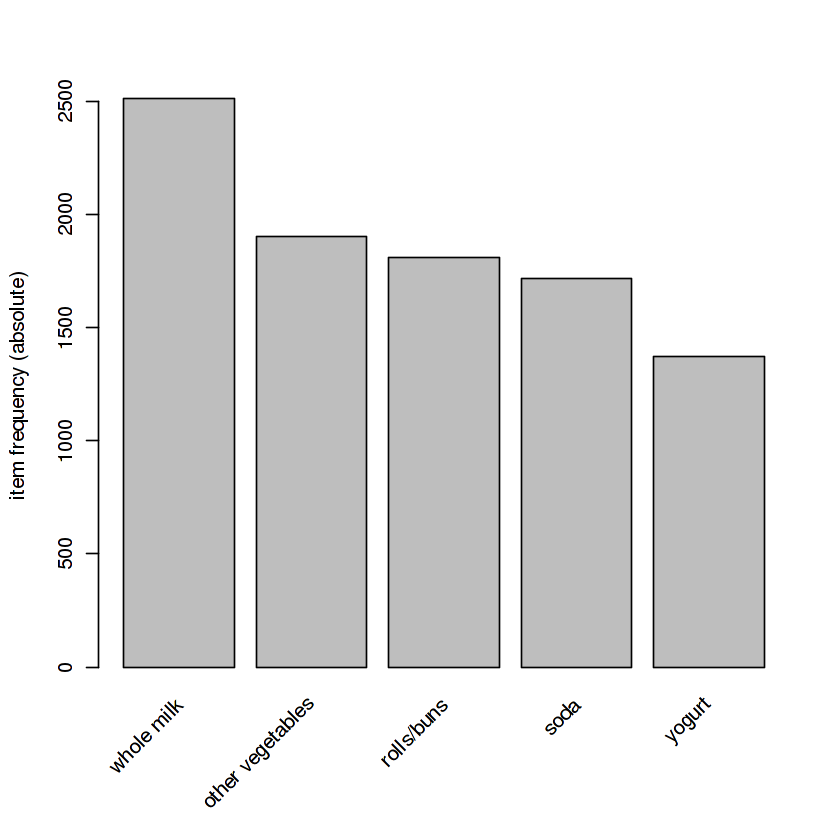

In [4]:
itemFrequencyPlot(Groceries,topN=5,type="absolute")

Ci-dessus, on peut voir les 5 produits les plus consommé.

#### f. 
Pour savoir quel pourcentage de transactions contiennent du yaourt, on utillise la fonction `itemFrequency`

In [5]:
itemFrequency(Groceries[, "yogurt"])

yogurt 
0.1395018

Comme il écrit ci-dessus, environ **14%** des transactions contiennent du yaourt.

#### g. 

In [6]:
summary(Groceries[size(Groceries) == 7])

transactions as itemMatrix in sparse format with
 545 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.04142012 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
             211              160              146              144 
 root vegetables          (Other) 
             125             3029 

element (itemset/transaction) length distribution:
sizes
  7 
545 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      7       7       7       7       7       7 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  liver loaf sausage meat and sausage

On peut voir qu'il y a **545 transactions** qui contiennent exactement 7 produits.

#### h.
On repete le même procédé que ci-dessus:

In [7]:
summary(Groceries[size(Groceries) == 2])

transactions as itemMatrix in sparse format with
 1643 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.01183432 

most frequent items:
      rolls/buns             soda       whole milk      canned beer 
             233              219              205              117 
other vegetables          (Other) 
             113             2399 

element (itemset/transaction) length distribution:
sizes
   2 
1643 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  liver loaf sausage meat and sausage

On peut donc lire qu'il y a **1643 transactions** qui contiennent exactement 2 produits.

#### i.

In [8]:
mean(size(Groceries))

[1] 4.409456

La taille moyenne d'une transaction varie entre 4 et 5 produit.

### Step 4

La fonction inpect() nous permet de voire le contenu de notre sparse matrix. Ainsi en sélectionnant les transactions de 4 à 8 on peut voir leur contenu.

In [9]:
inspect(Groceries[4:8])

    items                     
[1] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[2] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[3] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        
[4] {rolls/buns}              
[5] {other vegetables,        
     UHT-milk,                
     rolls/buns,              
     bottled beer,            
     liquor (appetizer)}      


### Step 5

Pour trouver la proportion de transactions contenant le premier item, on réutilise la fonction `itemFrequency()` mais cette fois on récupère le nom du produit grâce à son index.

In [10]:
itemFrequency(Groceries[, Groceries@itemInfo$labels[1]])

frankfurter 
 0.05897306

On vois ainsi que, le premier produit est **présent dans environ 6% des transaction**.

### Step 6

De meme que pour la 5ème étape, à la différence près que l'on indique plusieurs éléments.

In [11]:
itemFrequency(Groceries[, Groceries@itemInfo$labels[3:7]])


liver loaf               ham              meat finished products 
      0.005083884       0.026029487       0.025826131       0.006507372 
  organic sausage 
      0.002236909

### Step 7
Comme à l'étape 3.e on peut afficher un histogramme, cette fois en indiquant que l'on veut afficher uniquement les éléments avec au moins 15% de support.

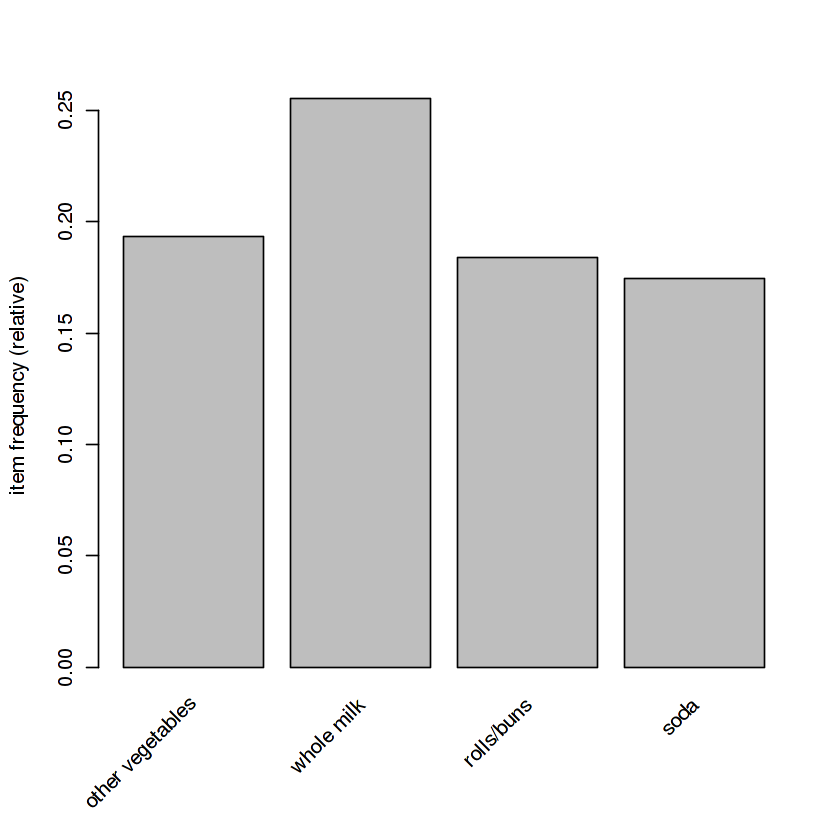

In [12]:
itemFrequencyPlot(Groceries, support=0.15)

### Step 8
Pour afficher les proportions des 10 premiers items, on peut tout d'abord les afficher dans une histogramme pour avoir un rendu visuel.

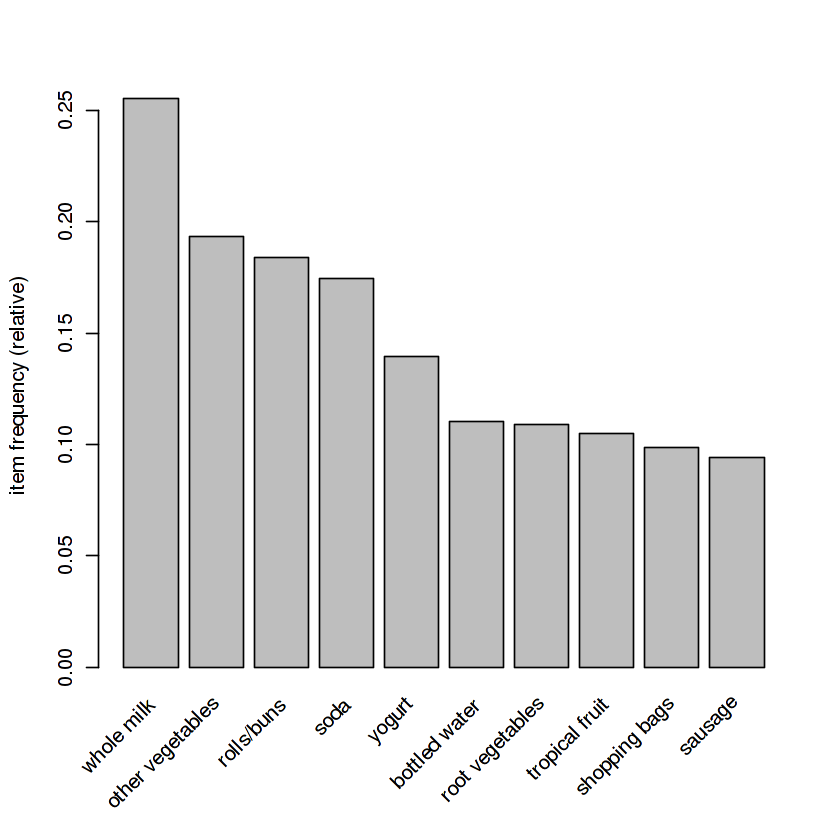

In [13]:
itemFrequencyPlot(Groceries,topN=10)

Pour afficher la valeur :

In [14]:
sort(itemFrequency(Groceries), decreasing = TRUE)[1:10]

whole milk other vegetables       rolls/buns             soda 
      0.25551601       0.19349263       0.18393493       0.17437722 
          yogurt    bottled water  root vegetables   tropical fruit 
      0.13950178       0.11052364       0.10899847       0.10493137 
   shopping bags          sausage 
      0.09852567       0.09395018

### Step 9
La manière la plus simple de voir la matrice entiere et d'utiliser la fonction `image`. Mais le dataset contenant 9835 transactions, le rendu n'est pas très lisible.

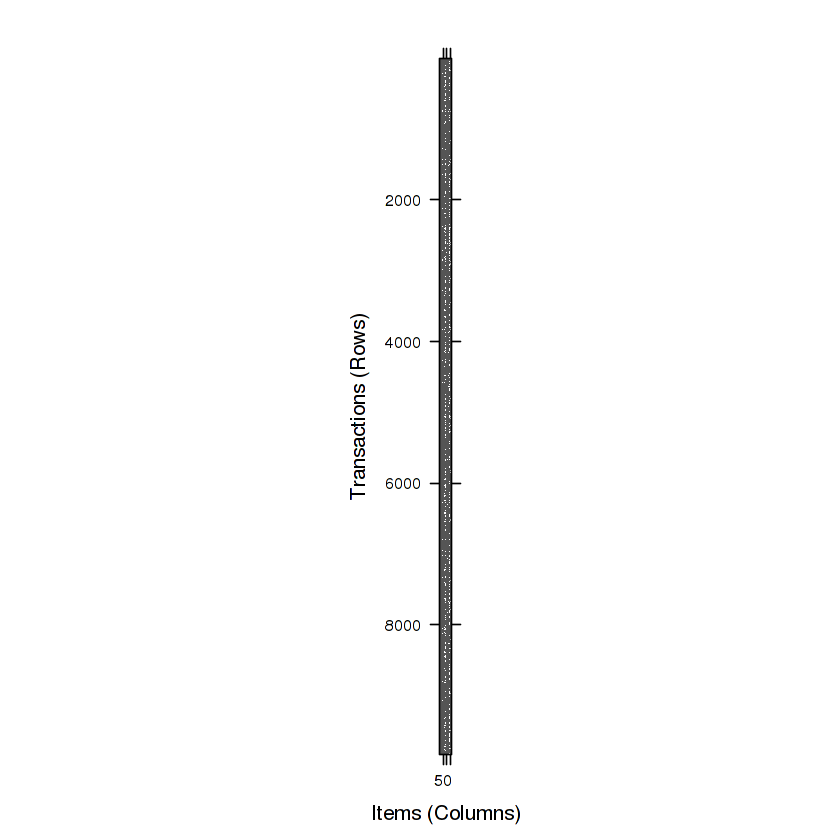

In [15]:
image(Groceries)

Afin de voir plus distinctement, prenons les 1000 premières transactions.

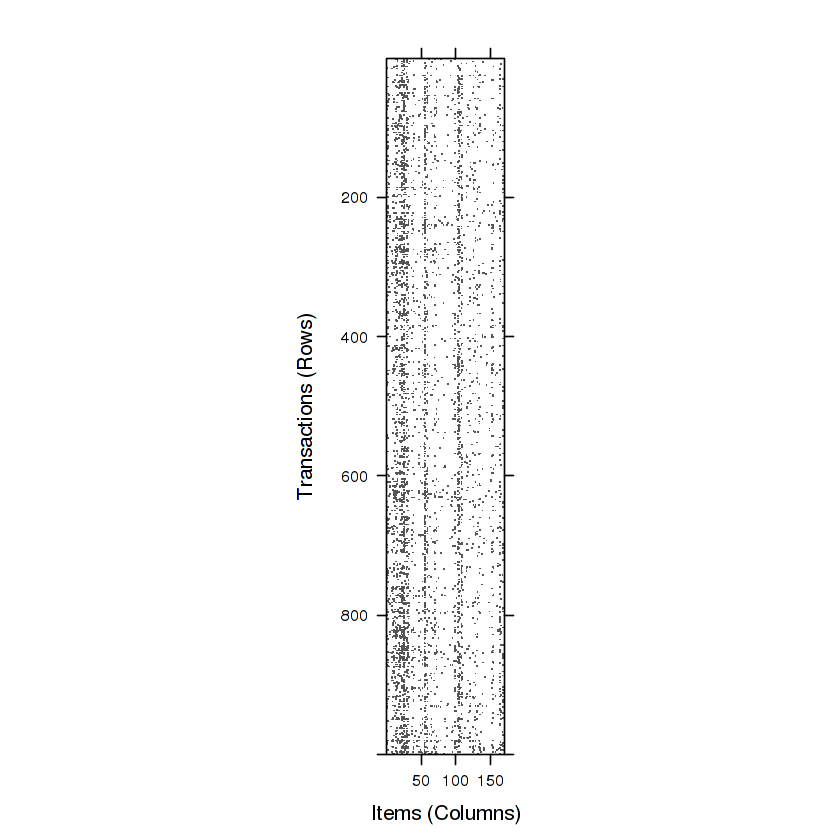

In [16]:
image(Groceries[1:1000])

On distingue 3 "lignes" qui se tracent, si l'on regarde les fréquences des éléments autour de ces indexes on retrouve les items qui sont les plus fréquent dans le dataset.  
La première ligne apparait dans les 50 premiers items.  
Si l'on regarde de plus près on voit que 3 des 5 produits les plus consommé se trouve à cet endroit (voir partie I.3.e).


In [17]:
itemFrequency(Groceries[, c(Groceries@itemInfo$labels[23:25], Groceries@itemInfo$labels[30])])

other vegetables packaged fruit/vegetables                whole milk 
               0.19349263                0.01301474                0.25551601 
                   yogurt 
               0.13950178

Une deuxième tendance se dessine un peu après le 50ème index, il s'agit du troisieme élément le plus acheté:

In [18]:
itemFrequency(Groceries[, Groceries@itemInfo$labels[56]])

rolls/buns 
 0.1839349

 La troisième ligne apparait un peu après le produit avec l'index 100. C'est la que se trouve l'élément manquant du top 5, le soda.

In [19]:
itemFrequency(Groceries[, Groceries@itemInfo$labels[103:104]])

bottled water          soda 
    0.1105236     0.1743772